####PREDICT EMPLOYEE TURNOVER WITH SCI-KIT LEARN####

In [0]:
# Importing the libraries
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [0]:
from google.colab import files
uploaded= files.upload()

Saving employee_data.csv to employee_data.csv


In [0]:
# Importing the dataset
import io
df= pd.read_csv(io.BytesIO(uploaded['employee_data.csv']))
df_orig = df
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [0]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


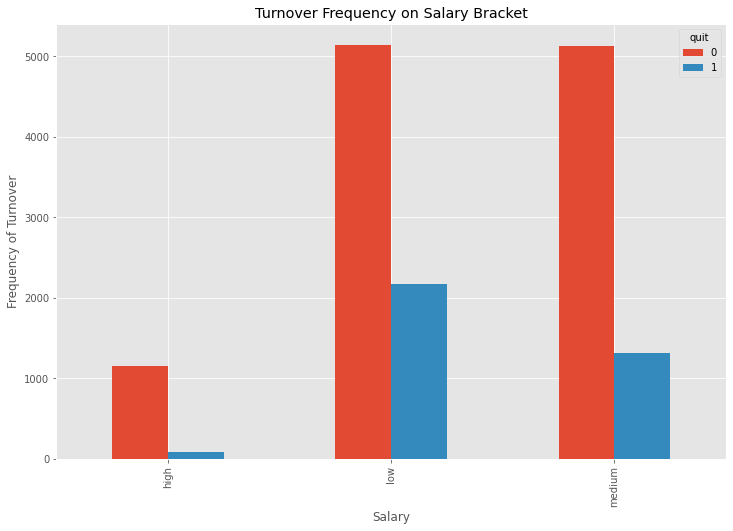

In [0]:
pd.crosstab(df.salary, df.quit).plot(kind='bar')
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel("Salary")
plt.ylabel("Frequency of Turnover")
plt.show()

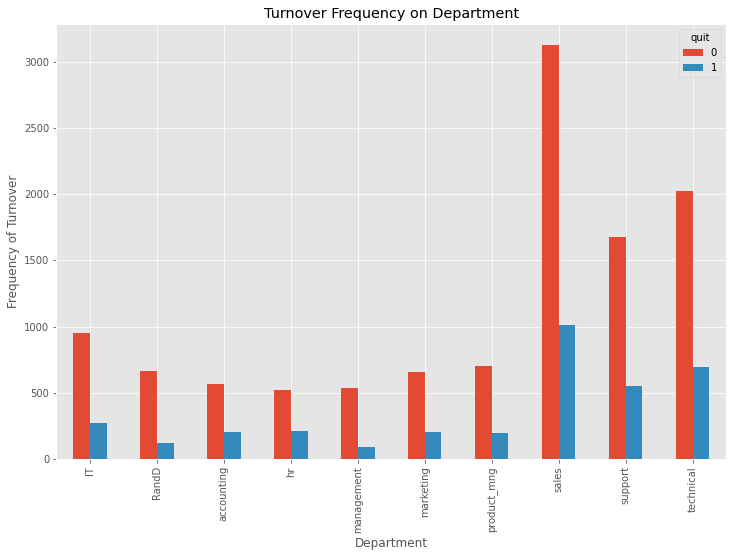

In [0]:
pd.crosstab(df.department, df.quit).plot(kind='bar')
plt.title('Turnover Frequency on Department')
plt.xlabel("Department")
plt.ylabel("Frequency of Turnover")
plt.show()

In [0]:
# Encoding the categorical features
categorical_vars=['department','salary']
for var in categorical_vars:
  cat_list=pd.get_dummies(df[var], prefix=var)
  df=df.join(cat_list)

In [0]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
df.drop(columns=['department', 'salary'], axis=1, inplace=True)

In [0]:
# Visualising class imbalance
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize']=(12,8)

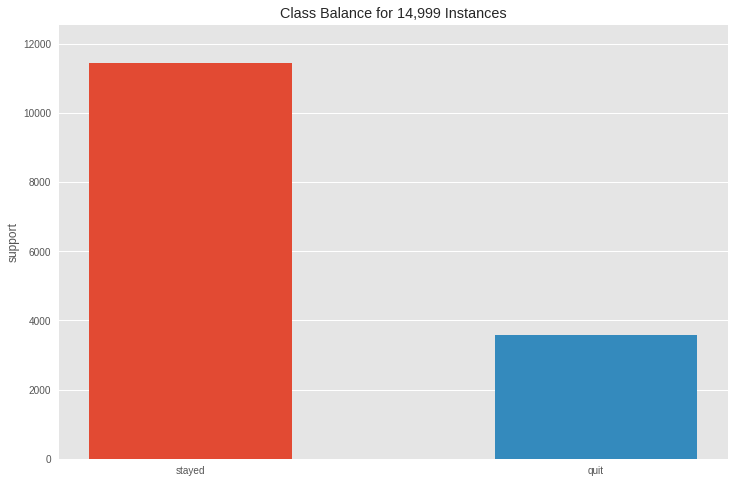

In [0]:
visualizer=ClassBalance(labels=['stayed','quit']).fit(df.quit)
visualizer.poof()

In [0]:
# Creating Train and Test Sets
X=df.loc[:, df.columns!= 'quit']
Y=df.quit

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state=0, test_size=0.2, stratify=Y)

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import SVG , display , Image
from graphviz import Source
from ipywidgets import interactive, IntSlider, FloatSlider, interact
from subprocess import call
import matplotlib.image as mpimg

Decision Tree Training Accuracy: 0.969
Decision Tree Test Accuracy: 0.969


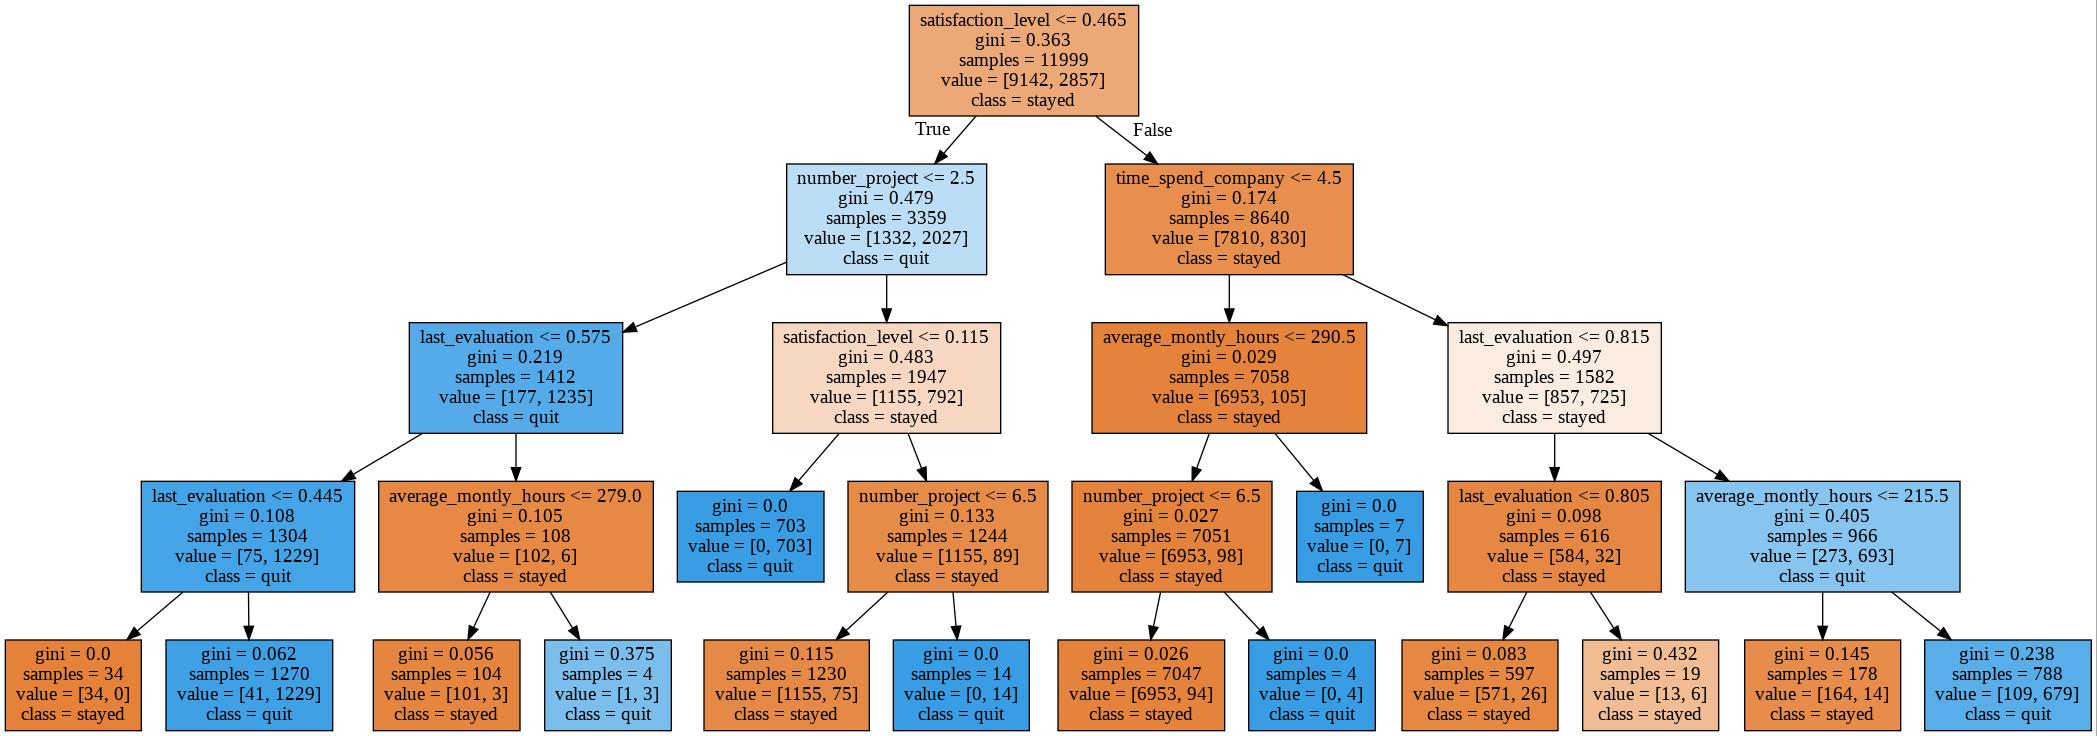

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
# Building an Interactive Decision Tree Classifier
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1, max=20, value=2, continuous_update=False),
              min_split=IntSlider(min=2, max=5, value=2, continuous_update=False),
              min_leaf=IntSlider(min=1, max=5, value=1, continuous_update=False)):
    estimator = DecisionTreeClassifier(random_state=0,
                                     criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf)
    estimator.fit(X_train, Y_train)
    print("Decision Tree Training Accuracy: {:.3f}".format(accuracy_score(Y_train, estimator.predict(X_train))))
    print("Decision Tree Test Accuracy: {:.3f}".format(accuracy_score(Y_test, estimator.predict(X_test))))
    graph= Source(tree.export_graphviz(estimator, out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='jpg')))
    return estimator

In [0]:
# Building an Interactive Random Forest Classifier
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1, max=20, value=3 , continuous_update=False),
                 forests=IntSlider(min=1, max=200, value=100, continuous_update=False),
                 min_split=IntSlider(min=2, max=5, value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1, max=5, value=1, continuous_update=False)):
    estimator= RandomForestClassifier(random_state=1,
                                      criterion=crit,
                                      bootstrap=bootstrap,
                                      n_estimators=forests,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf,
                                      n_jobs=-1,
                                      verbose=False)
    estimator.fit(X_train,Y_train)
    print("Random Forests Training Accuracy: {:.3f}".format(accuracy_score(Y_train, estimator.predict(X_train))))
    print("Random Forests Test Accuracy: {:.3f}".format(accuracy_score(Y_test, estimator.predict(X_test))))
    num_tree= estimator.estimators_[0]
    print("\ Visualising Tree number: ",0)
    graph= Source(tree.export_graphviz(num_tree,
                                       out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='jpg')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

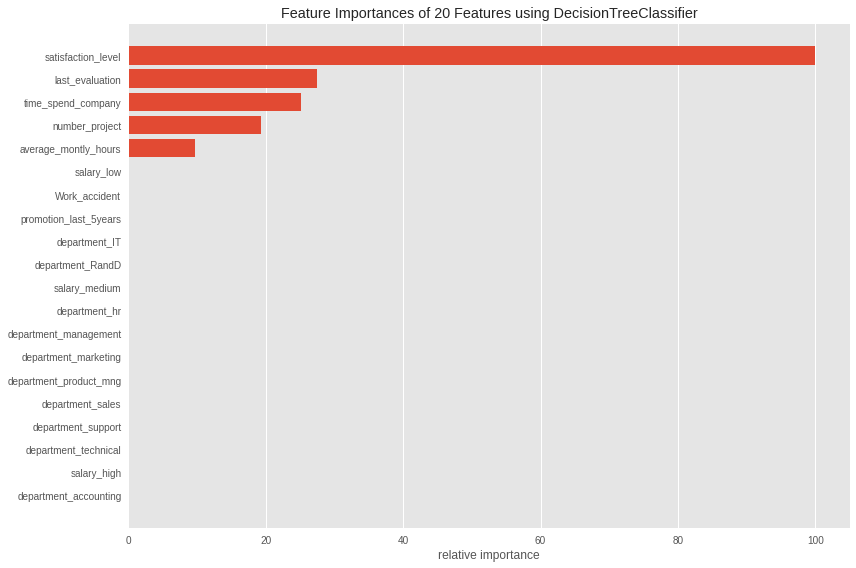

In [0]:
# Visualizing Decision Tree Classifier
dt= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

viz= FeatureImportances(dt)
viz.fit(X_train, Y_train)
viz.poof();

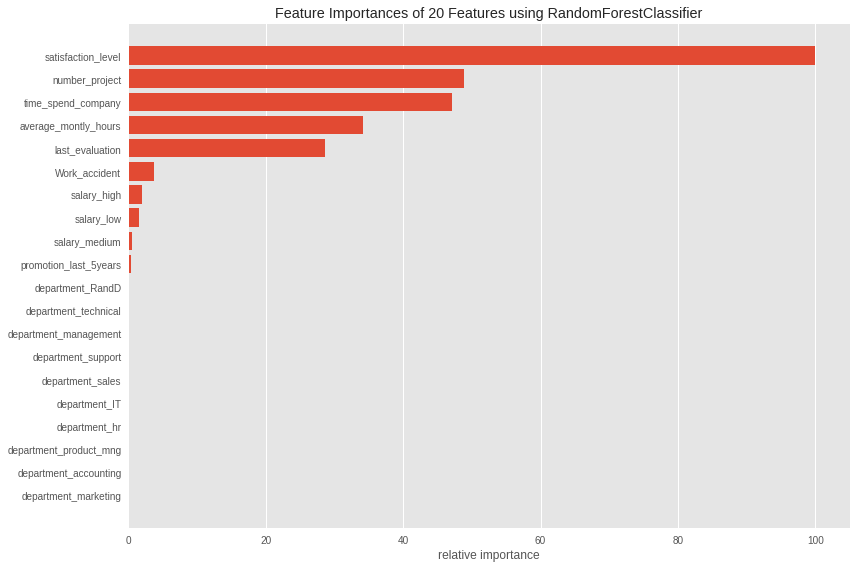

In [0]:
# Visualizing Random Forest Classifier
from yellowbrick.features.importances import FeatureImportances
plt.rcParams["figure.figsize"]=(12,8)
plt.style.use("ggplot")

rf= RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=86, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=False,
                       warm_start=False)
viz= FeatureImportances(rf)
viz.fit(X_train, Y_train)
viz.poof();

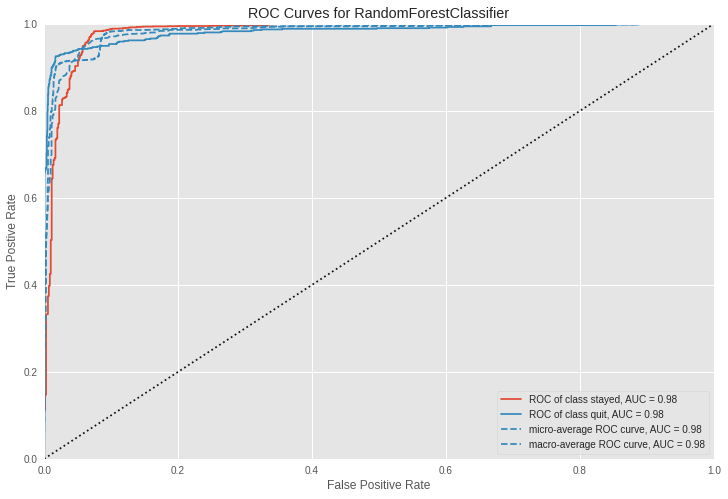

In [0]:
from yellowbrick.classifier import ROCAUC
visualizer= ROCAUC(rf, classes=["stayed","quit"])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof();

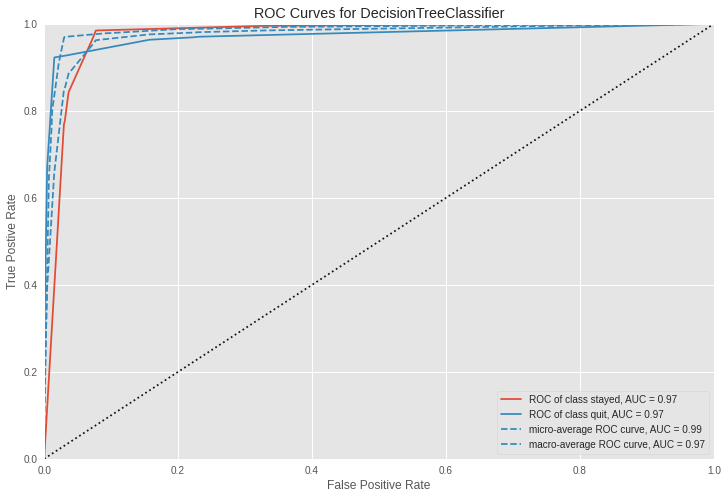

In [0]:
from yellowbrick.classifier import ROCAUC
visualizer= ROCAUC(dt, classes=["stayed","quit"])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof();